In [38]:
import chardet

# 파일의 앞부분만 읽어 인코딩 추정
with open('./datalab2.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # 바이트 수는 상황에 따라 조정
    print(result)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [28]:
import pandas as pd
data_df = pd.read_csv('./datalab2.csv')
data_df.head()

,날짜,스트레스,건강,습관
0,2024-07-14,40.20021,24.23603,12.38145
1,2024-07-15,50.47418,36.77555,13.01369
2,2024-07-16,52.37091,33.77239,13.38250
3,2024-07-17,50.79030,42.09694,13.22444
4,2024-07-18,49.05163,39.93677,15.43730


In [29]:
corr_df = data_df[['스트레스', '건강', '습관']]
corr_df.corr()

,스트레스,건강,습관
스트레스,1.000000,0.470394,0.467214
건강,0.470394,1.000000,0.443681
습관,0.467214,0.443681,1.000000


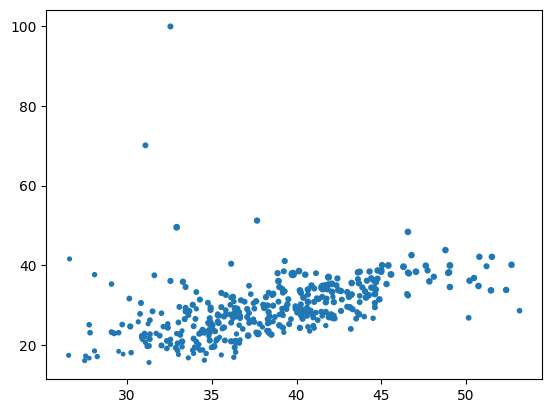

In [30]:
import matplotlib.pyplot as plt
plt.scatter(corr_df['스트레스'], corr_df['건강'], corr_df['습관'] )
plt.show()

피어슨 상관계수 (Pearson Correlation Coefficient)  

키와 몸무게 간의 관계 (일반적으로 키가 큰 사람이 몸무게도 더 나가는 경향이 있을 때 사용)

In [31]:
import pandas as pd
from scipy.stats import pearsonr

# 예시 데이터
data = {
    'height': [160, 165, 170, 175, 180],
    'weight': [50, 55, 65, 70, 80]
}
df = pd.DataFrame(data)

# 피어슨 상관계수 계산
corr, p_value = pearsonr(df['height'], df['weight'])

print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.4f}")

피어슨 상관계수: 0.99
p-값: 0.0006


스피어만 상관계수 (Spearman's Rank Correlation Coefficient)   
   
학생 성적 순위와 스포츠 성적 순위 간의 관계.

In [33]:
import pandas as pd
from scipy.stats import spearmanr

# 데이터프레임 구성
data = {
    'student': ['A', 'B', 'C', 'D', 'E'],
    'academic_rank': [1, 2, 3, 4, 5],
    'sports_rank': [4, 2, 1, 3, 5]
}
df = pd.DataFrame(data)

# 스피어만 상관계수 계산
rho, pval = spearmanr(df['academic_rank'], df['sports_rank'])

print(f"스피어만 상관계수: {rho:.3f}")
print(f"p-value: {pval:.4f}")

스피어만 상관계수: 0.300
p-value: 0.6238


켄달의 타우 (Kendall's Tau, Kendall's Rank Correlation Coefficient)   


키와 몸무게 간의 관계

In [35]:
import pandas as pd
from scipy.stats import kendalltau

# 사람 A~E의 키와 몸무게 순위
data = {
    'Person': ['A', 'B', 'C', 'D', 'E'],
    'Height_rank': [1, 2, 3, 4, 5],     # 키 순위
    'Weight_rank_1': [3, 4, 1, 2, 5],   # τ = 0.2
    'Weight_rank_2': [1, 2, 3, 4, 5],   # τ = 1
    'Weight_rank_3': [5, 4, 3, 2, 1]    # τ = -1
}

df = pd.DataFrame(data)

# 계수 계산
tau1, _ = kendalltau(df['Height_rank'], df['Weight_rank_1'])
tau2, _ = kendalltau(df['Height_rank'], df['Weight_rank_2'])
tau3, _ = kendalltau(df['Height_rank'], df['Weight_rank_3'])

print(f"상관계수 (Weight_rank_1): {tau1:.2f}")
print(f"상관계수 (Weight_rank_2): {tau2:.2f}")
print(f"상관계수 (Weight_rank_3): {tau3:.2f}")

상관계수 (Weight_rank_1): 0.20
상관계수 (Weight_rank_2): 1.00
상관계수 (Weight_rank_3): -1.00
